In [165]:
import pandas as pd
df= pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [180]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [166]:
df.shape

(440, 8)

In [167]:
df.duplicated().sum()

np.int64(0)

In [168]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [175]:
df['Channel'].value_counts()



Channel
1    298
2    142
Name: count, dtype: int64

In [174]:
df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [176]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [133]:
df.skew()

Channel             0.000000
Region             -0.446962
Fresh               0.447234
Milk                0.489804
Grocery             0.548266
Frozen              0.272212
Detergents_Paper    0.366399
Delicassen          0.212400
dtype: float64

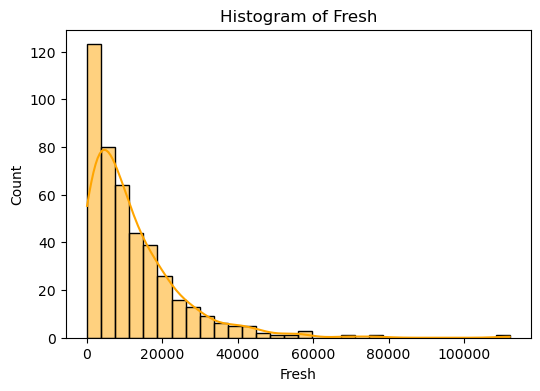

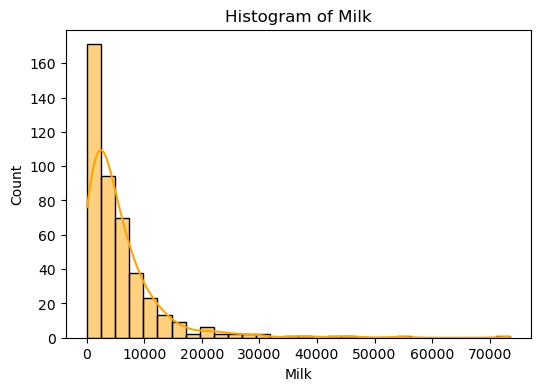

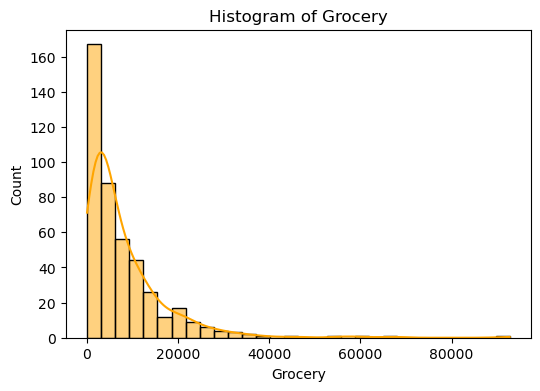

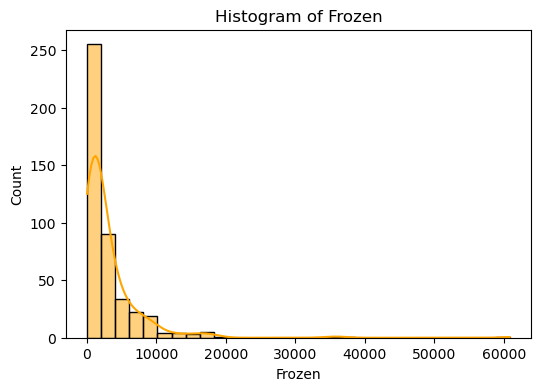

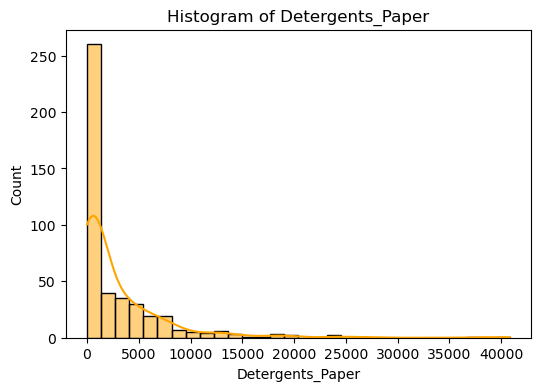

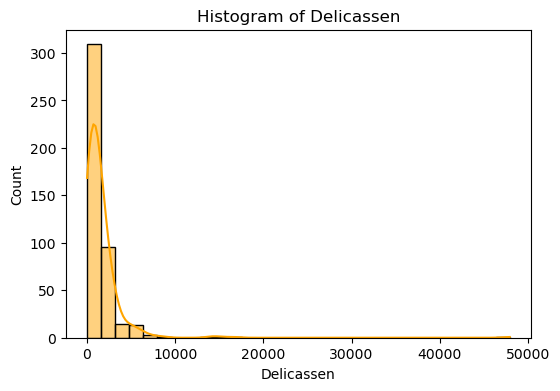

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True, color="orange")
    plt.title(f"Histogram of {col}")
    plt.show()



In [182]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)


Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [183]:
skewness = df[numeric_cols].skew()
print(skewness)


Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64


In [184]:
right_skewed_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df[right_skewed_cols] = pt.fit_transform(df[right_skewed_cols])


In [185]:
print(df[right_skewed_cols].skew())


Fresh              -0.041616
Milk                0.001390
Grocery             0.031159
Frozen              0.002641
Detergents_Paper   -0.016883
Delicassen          0.096251
dtype: float64


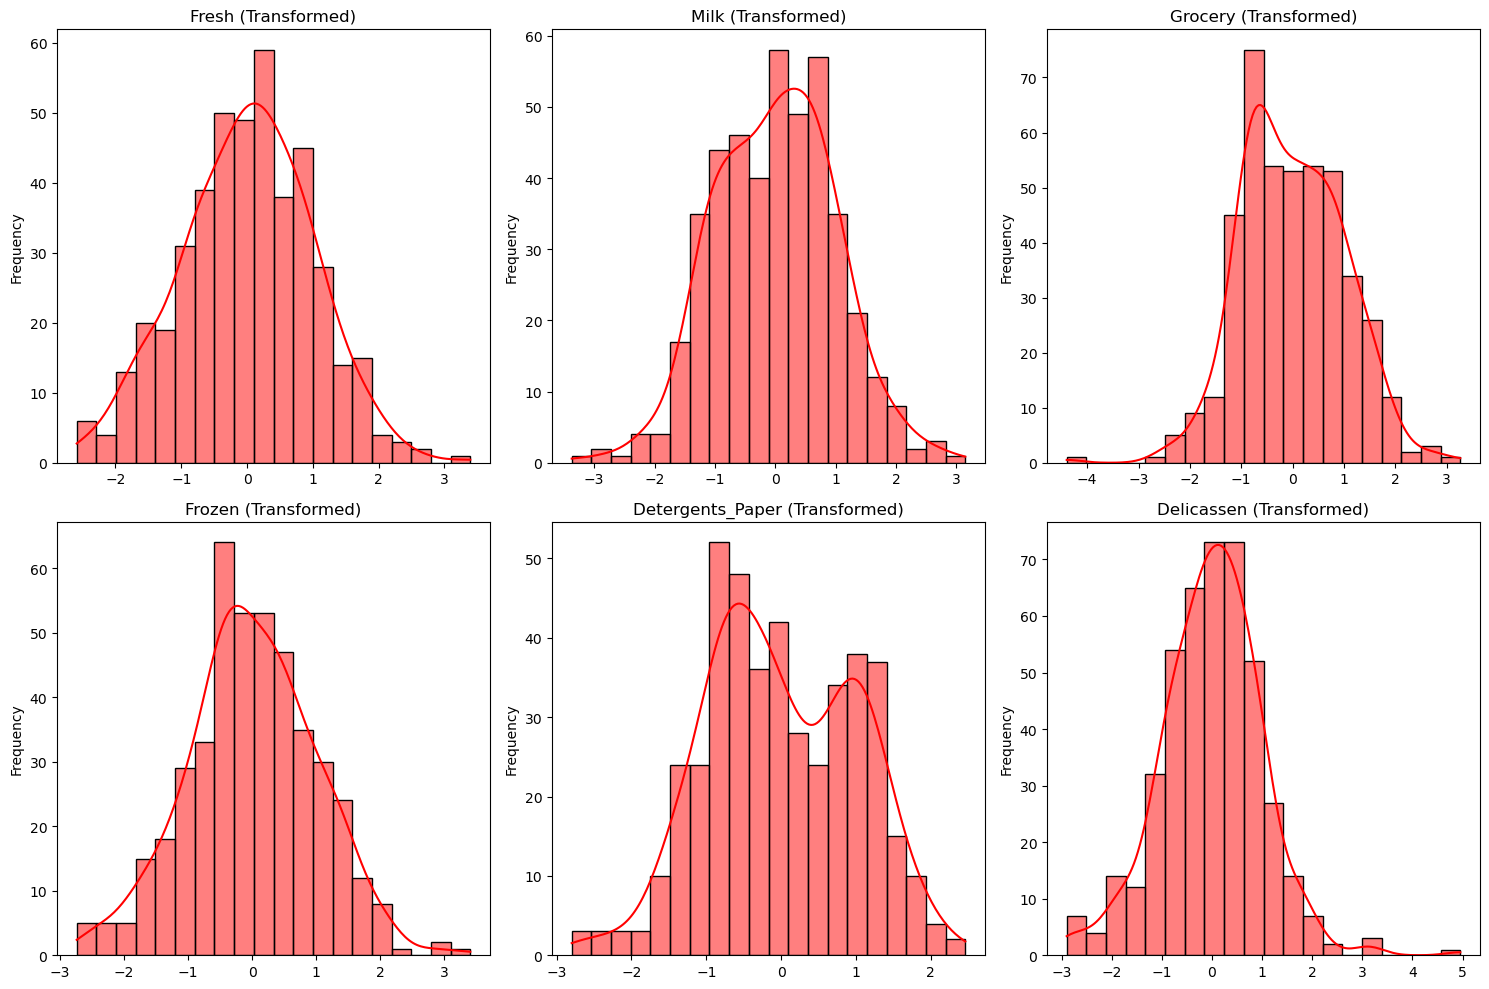

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

plt.figure(figsize=(15,10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns grid
    sns.histplot(df[col], kde=True, bins=20, color='red')
    plt.title(f'{col} (Transformed)')
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\VIHASHINI\AppData\Local\Temp\ipykernel_3680\1088725214.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette="pastel")


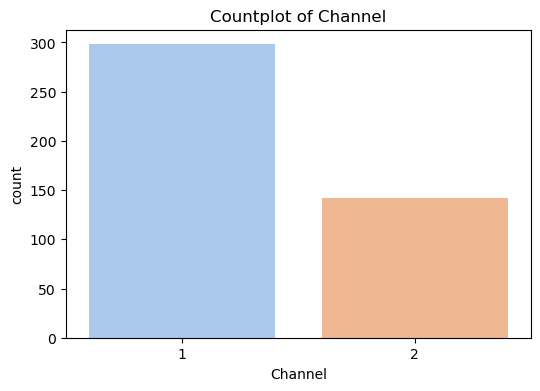

C:\Users\VIHASHINI\AppData\Local\Temp\ipykernel_3680\1088725214.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette="pastel")


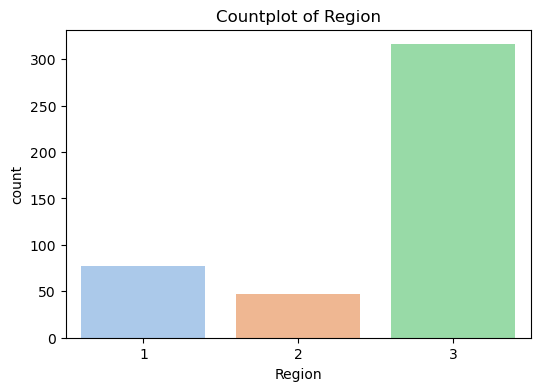

In [188]:
cat_cols = ["Channel","Region"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col,data=df,palette="pastel")
    plt.title(f"Countplot of {col}")
    plt.show()

In [189]:
df = pd.get_dummies(df, columns=['Channel', 'Region'], drop_first=True)


In [191]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  


c:\Users\VIHASHINI\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\VIHASHINI\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\VIHASHINI\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\VIHASHINI\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

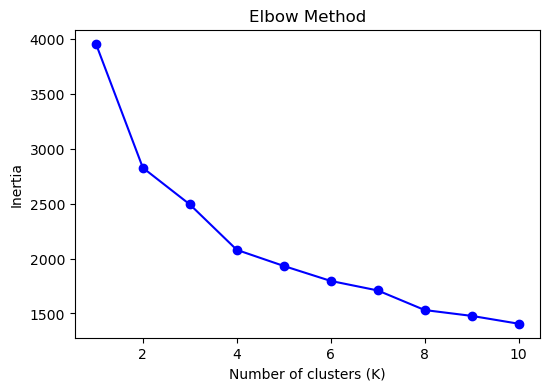

In [192]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


c:\Users\VIHASHINI\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\VIHASHINI\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\VIHASHINI\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\VIHASHINI\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

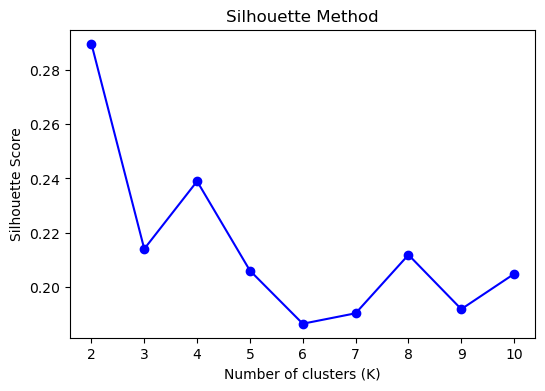

In [193]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    sil = silhouette_score(df_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(6,4))
plt.plot(range(2,11), sil_scores, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


In [204]:
best_k = K_range[np.argmax(sil_scores)]
print(f"Best K based on Silhouette Score: {best_k}")
print(f"Highest Silhouette Score: {max(sil_scores):.4f}")

Best K based on Silhouette Score: 1
Highest Silhouette Score: 0.2895


In [206]:
df[numeric_cols].var()


Fresh               1.002278
Milk                1.002278
Grocery             1.002278
Frozen              1.002278
Detergents_Paper    1.002278
Delicassen          1.002278
dtype: float64

In [207]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df[numeric_cols])

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_num_scaled)


c:\Users\VIHASHINI\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(df_num_scaled)

df['DBSCAN_Cluster'] = db_labels

unique, counts = np.unique(db_labels, return_counts=True)
print(dict(zip(unique, counts)))




{np.int64(-1): np.int64(35), np.int64(0): np.int64(405)}


In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster


# Linkage matrix using Ward method
Z = linkage(df_num_scaled, method='ward')

# Assign cluster labels, same number of clusters as KMeans for comparison
hier_labels = fcluster(Z, 3, criterion='maxclust')

# Add to DataFrame
df['Hierarchical_Cluster'] = hier_labels

# Check cluster distribution
unique, counts = np.unique(hier_labels, return_counts=True)
print(dict(zip(unique, counts)))


KMeans cluster counts: {np.int32(0): np.int64(126), np.int32(1): np.int64(219), np.int32(2): np.int64(95)}
{np.int32(1): np.int64(182), np.int32(2): np.int64(65), np.int32(3): np.int64(193)}


In [211]:
import numpy as np

unique, counts = np.unique(labels, return_counts=True)
kmeans_counts = dict(zip(unique, counts))
print("KMeans cluster counts:", kmeans_counts)

KMeans cluster counts: {np.int32(0): np.int64(126), np.int32(1): np.int64(219), np.int32(2): np.int64(95)}


In [213]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

def compute_metrics_safe(X, labels):
    # Exclude noise points for DBSCAN (-1)
    mask = labels != -1
    unique_clusters = np.unique(labels[mask])
    
    # If less than 2 clusters, return None
    if len(unique_clusters) < 2:
        return None, None, None
    
    sil = silhouette_score(X[mask], labels[mask])
    ch = calinski_harabasz_score(X[mask], labels[mask])
    db = davies_bouldin_score(X[mask], labels[mask])
    return sil, ch, db

# Example usage
sil_k, ch_k, db_k = compute_metrics_safe(df_num_scaled, labels)  # KMeans
sil_h, ch_h, db_h = compute_metrics_safe(df_num_scaled, df['Hierarchical_Cluster'].values)
sil_d, ch_d, db_d = compute_metrics_safe(df_num_scaled, df['DBSCAN_Cluster'].values)

print("Evaluation Metrics:")
print(f"KMeans       -> Silhouette: {sil_k}, Calinski-Harabasz: {ch_k}, Davies-Bouldin: {db_k}")
print(f"Hierarchical -> Silhouette: {sil_h}, Calinski-Harabasz: {ch_h}, Davies-Bouldin: {db_h}")
print(f"DBSCAN       -> Silhouette: {sil_d}, Calinski-Harabasz: {ch_d}, Davies-Bouldin: {db_d}")


Evaluation Metrics:
KMeans       -> Silhouette: 0.25105192217687544, Calinski-Harabasz: 161.1345851188905, Davies-Bouldin: 1.362506952065388
Hierarchical -> Silhouette: 0.23671983160394067, Calinski-Harabasz: 141.9535955302526, Davies-Bouldin: 1.3167884692043046
DBSCAN       -> Silhouette: None, Calinski-Harabasz: None, Davies-Bouldin: None


In [229]:
df.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen',
       'Channel_2', 'Region_2', 'Region_3', 'DBSCAN_Cluster',
       'Hierarchical_Cluster', 'KMeans_Cluster'],
      dtype='object')